# Algoritmo PanTompkins
Algoritmo implementado para detectar a ocorrência do pico QRS em um sinal ECG. Foi desenvolvido por Jiapu Pan e Willis J. Tompkins em 1985 e publicado no journal "IEEE Transactions on Biomedical Engineering".
<br>
<p align="center">
<img src="pantompkins.png" height="250" width="800">
</p>

In [5]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig

## Carregar o sinal

O sinal utiliziado nesse notebook foi na frequência de 1kHz, diferente do original de 200Hz.

In [6]:
record, fields = wfdb.rdsamp("database_part/s0004_re", channels=[0])

Plotar os dados

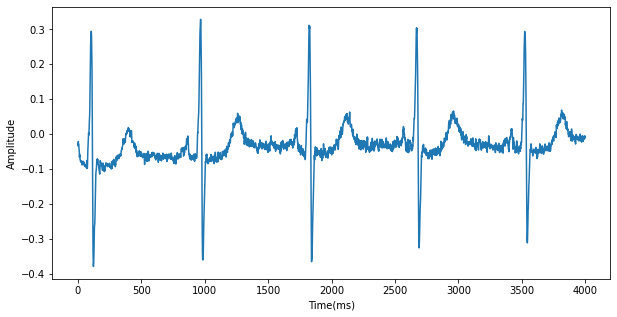

In [7]:
tamanho = np.linspace(0, len(record), num = len(record))
plt.figure(figsize=(10,5))
plt.xlabel(xlabel="Time(ms)")
plt.ylabel(ylabel="Amplitude")
plt.plot(tamanho[0:4000], record[0:4000])

## Filtro Passa Faixa
De acordo com o artigo de Pan, J., & Tompkins, deseja-se um filtro passa faixa entre 5 e 15 Hz. Isso porque é onde maximiza a energia do intervalo QRS.

### Filtro Passa Baixa

Função de transferência do filtro passa baixa:
<br>

$$H(z) = \frac{1}{32}\frac{(1 - z^{-6})^2}{(1 - z^{-1})^2}$$
<br>

Equação da diferença:
$$y(n) = 2y(n - 1) - y(n - 2) + \frac{1}{32}[x(n) - 2x(n - 6) + x(n - 12)]$$

In [21]:
#Funcao da equacao
def passa_baixa(sinal):
    lowpass = np.copy(sinal)
    for i in range(len(lowpass)-1):
        lowpass[i] = (2*lowpass[i-1]) - (lowpass[i-2]) + (sinal[i] - (2*sinal[i-6]) + sinal[i-12])
    return lowpass 

teste_passab = passa_baixa(record)



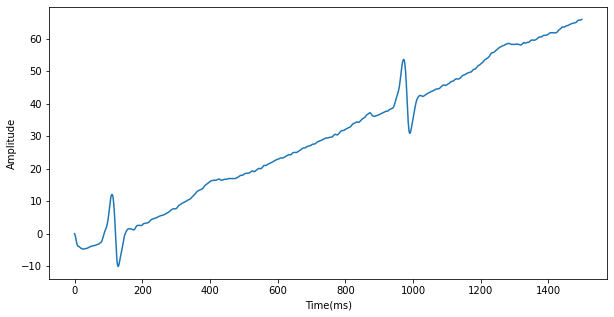

In [22]:
plt.figure(figsize=(10,5))
plt.xlabel(xlabel="Time(ms)")
plt.ylabel(ylabel="Amplitude")
plt.plot(tamanho[:1500], teste_passab[:1500])

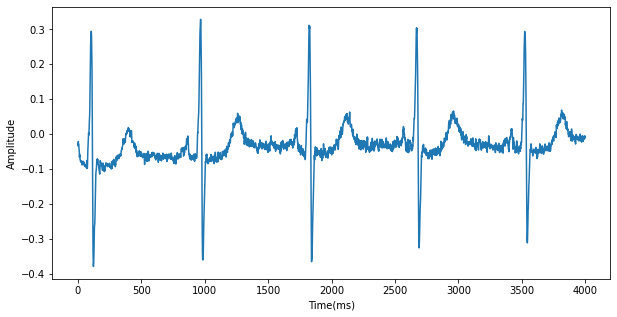

In [10]:
#Funcao de transferencia pronta na biblio scilab
x1 = sig.lfilter([1,0,0,0,0,0,-2,0,0,0,0,0,1],[1,-2,1],record)
plt.figure(figsize=(10,5))
plt.xlabel(xlabel="Time(ms)")
plt.ylabel(ylabel="Amplitude")
plt.plot(tamanho[0:4000], x1[0:4000])

### Filtro Passa Alta

Função de transferência do filtro passa baixa:
<br>

$$H(z) = \frac{(1 - z^{-32})}{(1 - z^{-1})}$$
<br>

Equação da diferença:
$$y(n) = y(n-1) - \frac{x(n)}{32} + x(n-16) - x(n-17) + \frac{x(n-32)}{32}$$

In [23]:
def passa_alta(sinal):
    hightpass = np.copy(sinal)
    for i in range(len(hightpass)-1):
        hightpass[i] = hightpass[i-1] - (sinal[i]/32) + sinal[i-16] - sinal[i-17] + (sinal[i-32]/32)
    return hightpass

teste_passaa = passa_alta(record)

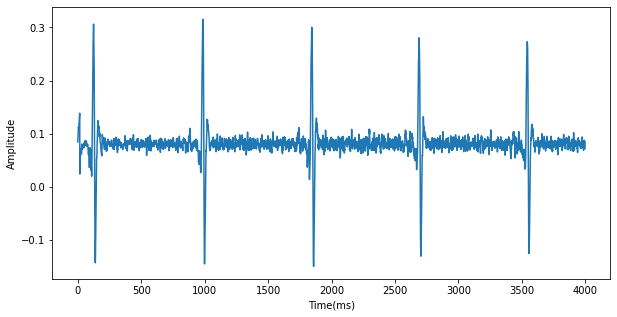

In [24]:
plt.figure(figsize=(10,5))
plt.xlabel(xlabel="Time(ms)")
plt.ylabel(ylabel="Amplitude")
plt.plot(tamanho[0:4000], teste_passaa[0:4000])

In [14]:
filtrado = passa_baixa(record)
filtrado = passa_alta(filtrado)

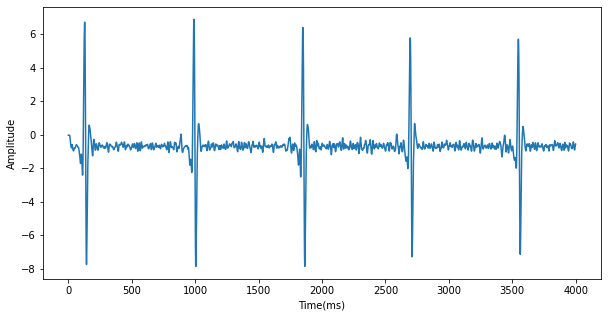

In [15]:
plt.figure(figsize=(10,5))
plt.xlabel(xlabel="Time(ms)")
plt.ylabel(ylabel="Amplitude")
plt.plot(tamanho[0:4000], filtrado[0:4000])

$$y(n) = \frac{1}{8}[2x(n) + x(n-1) - x(n-3) - 2x(n - 4)]$$

In [19]:
def diferencial(sinal):
    derivative = np.copy(sinal)
    for i in range(len(derivative)-1):
        derivative[i] = (1/8)*(2*sinal[i] + sinal[i-1] - sinal[i-3] - 2*sinal[i-4])
    return derivative
    
deriv_teste = np.power(diferencial(filtrado),2)

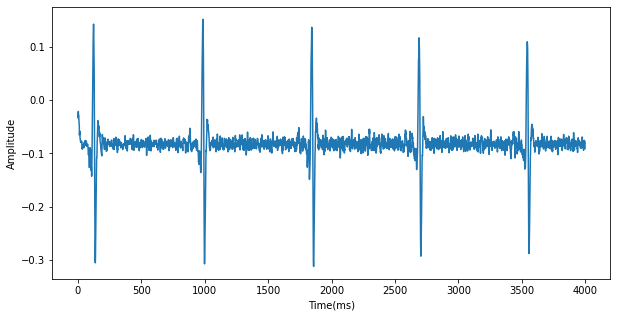

In [20]:
plt.figure(figsize=(10,5))
plt.xlabel(xlabel="Time(ms)")
plt.ylabel(ylabel="Amplitude")
plt.plot(tamanho[0:4000], teste_passaa[0:4000])

$$y(n) =\frac{1}{N}(x[n − (N − 1)] + x[n − (N − 2)] + · · · + x(n)$$

In [28]:
#Frequencia utilizada = 1kHz
#N é o tamanho da janela integrada
N = 40
def integration(n, sinal):
    integra = np.copy(sinal)
    for i in range(len(integra)):
        # Fazer somatorio primeiro
        somatorio = 0
        for j in range(n):
            somatorio = somatorio + sinal[i-(N-j)] 
        integra[i] = 1/n * somatorio
    return integra

In [29]:
deriv_teste = integration(N,deriv_teste)

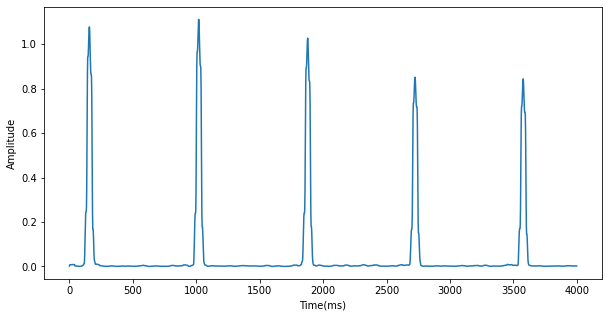

In [31]:
plt.figure(figsize=(10,5))
plt.xlabel(xlabel="Time(ms)")
plt.ylabel(ylabel="Amplitude")
plt.plot(tamanho[0:4000], deriv_teste[0:4000])